Homework 2: Simple linear regression using TensorFlow in Python
Universidad de Monterrey
Juan Carlos Delgado Reyes 613998 IMT
Inteligencia Artificial II
Andrés Hernández Gutiérrez
Agosto 2024 Universidad de Monterrey

Las siguientes líneas de codigo importan librerías conocidas para el análisis de datos, aprendizaje automático y visualización: numpy es para el cálculo numérico, panda es para la manipulación y análisis de datos, tensorflow es la que se usará para generar y entrenar el modelo, matplotlib es para visualizar con gráficas principalmente los datos y la recta. La función de sklearn.model_selection es para hacer una partición de los datos.

In [98]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

En esta celda vamos a generar nuestros propios datos con la función generate_data. El resto de líneas son los parámetros de esa función como el tamaño, ruido, coeficientes de la función y semilla de aleatoriedad.

In [99]:
def generate_data(true_coeffs=np.array([10,1]), noise_std=2, num_samples=100):

	# Seed for reproduction
	np.random.seed(4500)

	# Generate synthetic data
	x = np.arange(0,100,1)
	y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)

	# Return features and response
	return (x,y)

Aquí es donde mandamos a llamar a la función para obtener los datos sintéticos en las variables x y y.

In [100]:
# Generate a synthetic datset for simplelinear regresion
true_coeffs = np.array([10,1])
noise_std = 5
x, y = generate_data(true_coeffs, noise_std=noise_std, num_samples=100)

En esta celda vamos a graficar los datos anteriormente creados usando la librería matplotlib. Aquí se especifica el texto de la tabla, tamaño, leyendas, etc. Esto nos servirá para nalizar los datos y encontrar características importantes.

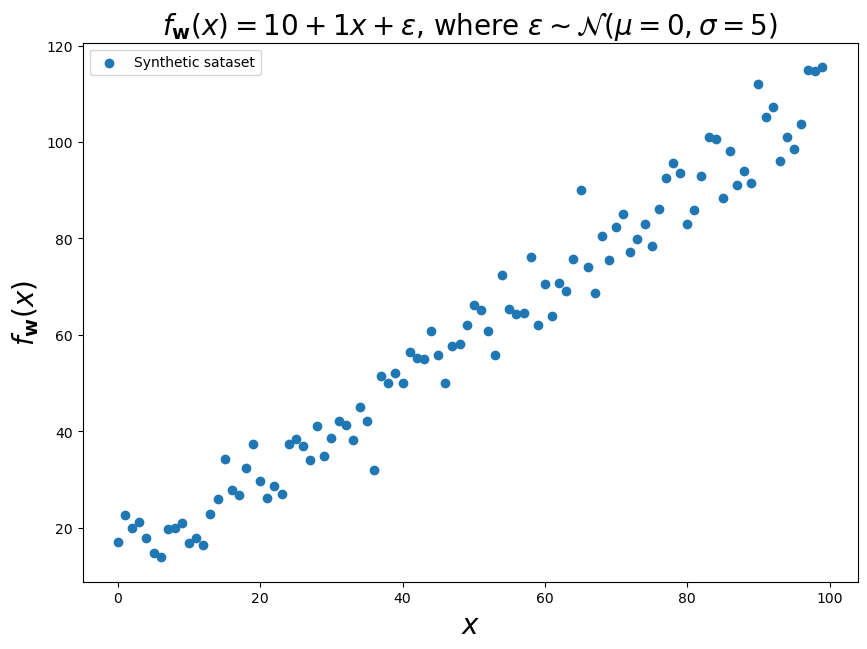

In [114]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x,y,label='Synthetic sataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",fontsize=20)
plt.legend()
plt.show()

Aqui usamos la función de train_test_split para separar nuestros datos de muestra en x y y de entrenamiento y prueba. En los parámetros seleccionamos la semilla de aleatoriedad, tamaño en porcentaje de la separación y si se hace una mezcla de datos.

In [105]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)


Las sigientes líneas de código permiten visualizar esta separación, se usa ahora un cambio de color a rojo para las muestras que se usan de entrenamiento y azul para las de prueba. Si no se usa otro random_state, se seleccionarán las mismas muestras de prueba.

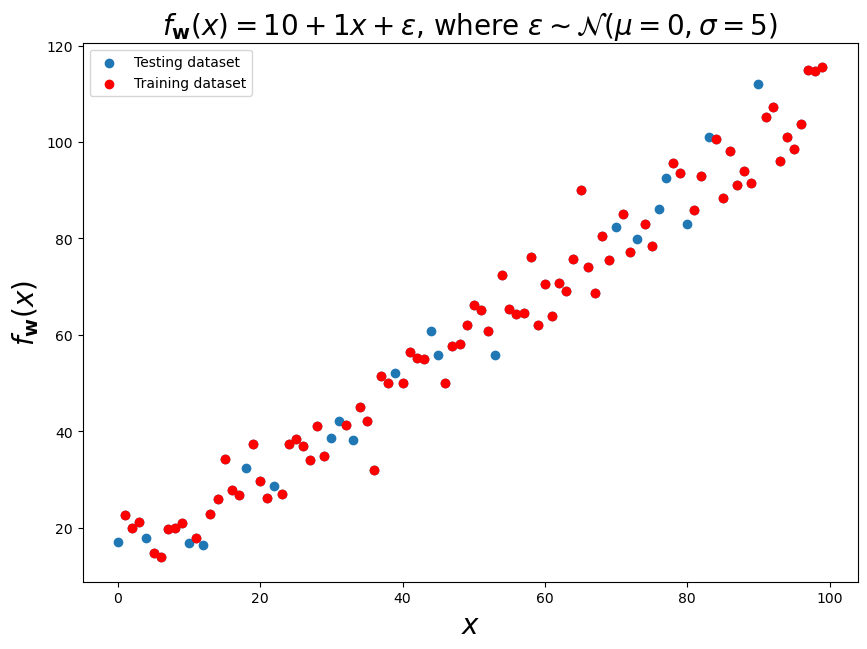

In [106]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x,y,label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",fontsize=20)
plt.legend()
plt.show()


A continuación se diseña la red neuronal de una neurona usando tensorflow. Esto se hará con el método Sequential para tener un modelo con el tamaño especificado en los parámetros de la función. Después seleccionamos el optimizador con la función model.compile, en este caso usamos el optimizador adam y la métrica a usar se establece en el parámetro loss dependiendo de lo que queramos obtener.

In [107]:
# Build the linear regresion model using a multiple-input single neuron
model = tf.keras.Sequential([
	tf.keras.layers.Input(shape=(1,)),
	tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

En esta línea se imprime un resumen del modelo, esto nos dice la cantidad de neuronas, los parámetros a estimar y el tipo de capa.

In [108]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Aquí se entrena el modelo con la función model.fit, se seleccionan parámetros como el número de épocas, número de lotes, partición de cada bloque para validación y si queremos desplegar la información en tiempo real.

La líniea de print la usamos para conocer la pérdida calculada en cada iteración, esto nos puede servir en que momento el modelo tiene sobreajuste para evaluar si usar un earlystoping

In [109]:
# Train the model
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

Epoch 1/500
8/8 [==============================] - 1s 47ms/step - loss: 365.8552 - val_loss: 330.8656
Epoch 2/500
8/8 [==============================] - 0s 13ms/step - loss: 350.9162 - val_loss: 313.5096
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 336.4234 - val_loss: 297.5908
Epoch 4/500
8/8 [==============================] - 0s 10ms/step - loss: 323.0207 - val_loss: 282.2155
Epoch 5/500
8/8 [==============================] - 0s 11ms/step - loss: 310.7079 - val_loss: 266.5067
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 296.8923 - val_loss: 251.9094
Epoch 7/500
8/8 [==============================] - 0s 13ms/step - loss: 284.1214 - val_loss: 237.5439
Epoch 8/500
8/8 [==============================] - 0s 15ms/step - loss: 272.2716 - val_loss: 224.4888
Epoch 9/500
8/8 [==============================] - 0s 14ms/step - loss: 261.1974 - val_loss: 211.6728
Epoch 10/500
8/8 [==============================] - 0s 12ms/step - loss: 250.1944 -

Epoch 82/500
8/8 [==============================] - 0s 10ms/step - loss: 67.4135 - val_loss: 25.1123
Epoch 83/500
8/8 [==============================] - 0s 8ms/step - loss: 67.3476 - val_loss: 25.2118
Epoch 84/500
8/8 [==============================] - 0s 8ms/step - loss: 67.3153 - val_loss: 25.2008
Epoch 85/500
8/8 [==============================] - 0s 9ms/step - loss: 67.2813 - val_loss: 25.2144
Epoch 86/500
8/8 [==============================] - 0s 12ms/step - loss: 67.2481 - val_loss: 25.2478
Epoch 87/500
8/8 [==============================] - 0s 9ms/step - loss: 67.2142 - val_loss: 25.2725
Epoch 88/500
8/8 [==============================] - 0s 8ms/step - loss: 67.1905 - val_loss: 25.3209
Epoch 89/500
8/8 [==============================] - 0s 8ms/step - loss: 67.1501 - val_loss: 25.2805
Epoch 90/500
8/8 [==============================] - 0s 8ms/step - loss: 67.1373 - val_loss: 25.2099
Epoch 91/500
8/8 [==============================] - 0s 12ms/step - loss: 67.1079 - val_loss: 25.19

Epoch 163/500
8/8 [==============================] - 0s 20ms/step - loss: 64.8656 - val_loss: 24.9886
Epoch 164/500
8/8 [==============================] - 0s 11ms/step - loss: 64.8133 - val_loss: 24.9480
Epoch 165/500
8/8 [==============================] - 0s 10ms/step - loss: 64.8177 - val_loss: 24.8010
Epoch 166/500
8/8 [==============================] - 0s 10ms/step - loss: 64.7635 - val_loss: 24.8101
Epoch 167/500
8/8 [==============================] - 0s 9ms/step - loss: 64.7412 - val_loss: 24.7664
Epoch 168/500
8/8 [==============================] - 0s 9ms/step - loss: 64.7001 - val_loss: 24.7374
Epoch 169/500
8/8 [==============================] - 0s 11ms/step - loss: 64.6977 - val_loss: 24.6388
Epoch 170/500
8/8 [==============================] - 0s 12ms/step - loss: 64.6507 - val_loss: 24.6998
Epoch 171/500
8/8 [==============================] - 0s 11ms/step - loss: 64.6036 - val_loss: 24.8597
Epoch 172/500
8/8 [==============================] - 0s 21ms/step - loss: 64.5633 - 

8/8 [==============================] - 0s 14ms/step - loss: 59.8637 - val_loss: 22.0774
Epoch 324/500
8/8 [==============================] - 0s 20ms/step - loss: 59.8320 - val_loss: 22.3051
Epoch 325/500
8/8 [==============================] - 0s 12ms/step - loss: 59.7901 - val_loss: 22.6430
Epoch 326/500
8/8 [==============================] - 0s 11ms/step - loss: 59.7990 - val_loss: 22.7621
Epoch 327/500
8/8 [==============================] - 0s 13ms/step - loss: 59.8052 - val_loss: 22.5119
Epoch 328/500
8/8 [==============================] - 0s 15ms/step - loss: 59.6848 - val_loss: 22.8462
Epoch 329/500
8/8 [==============================] - 0s 13ms/step - loss: 59.7244 - val_loss: 23.3788
Epoch 330/500
8/8 [==============================] - 0s 11ms/step - loss: 59.6993 - val_loss: 23.5623
Epoch 331/500
8/8 [==============================] - 0s 10ms/step - loss: 59.6711 - val_loss: 23.3235
Epoch 332/500
8/8 [==============================] - 0s 19ms/step - loss: 59.6302 - val_loss: 23

8/8 [==============================] - 0s 17ms/step - loss: 55.2908 - val_loss: 20.9893
Epoch 484/500
8/8 [==============================] - 0s 20ms/step - loss: 55.2712 - val_loss: 20.4636
Epoch 485/500
8/8 [==============================] - 0s 18ms/step - loss: 55.1786 - val_loss: 20.2087
Epoch 486/500
8/8 [==============================] - 0s 18ms/step - loss: 55.1598 - val_loss: 20.3391
Epoch 487/500
8/8 [==============================] - 0s 18ms/step - loss: 55.2028 - val_loss: 20.7356
Epoch 488/500
8/8 [==============================] - 0s 17ms/step - loss: 55.1344 - val_loss: 20.5922
Epoch 489/500
8/8 [==============================] - 0s 17ms/step - loss: 55.0831 - val_loss: 20.4316
Epoch 490/500
8/8 [==============================] - 0s 16ms/step - loss: 55.0632 - val_loss: 20.3105
Epoch 491/500
8/8 [==============================] - 0s 15ms/step - loss: 55.0233 - val_loss: 20.4181
Epoch 492/500
8/8 [==============================] - 0s 13ms/step - loss: 55.0145 - val_loss: 20

En la siguiente celda se imprimen la magnitud de los valores calculados por el modelo.

In [110]:
# Print the weights of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]: [[1.1140416]]
Biases [w0]: [2.077976]


En las siguientes líneas de código se hace una predicción de la salida con la función model.predict sobre los datos de prueba y entrenamiento, luego las siguientes líneas grafican la función generada con los coeficientes calculados del modelo en entrenamiento. Esta se sobrepone sobre los datos para observar que tan exacto fue.

3/3 [==============================] - 0s 3ms/step


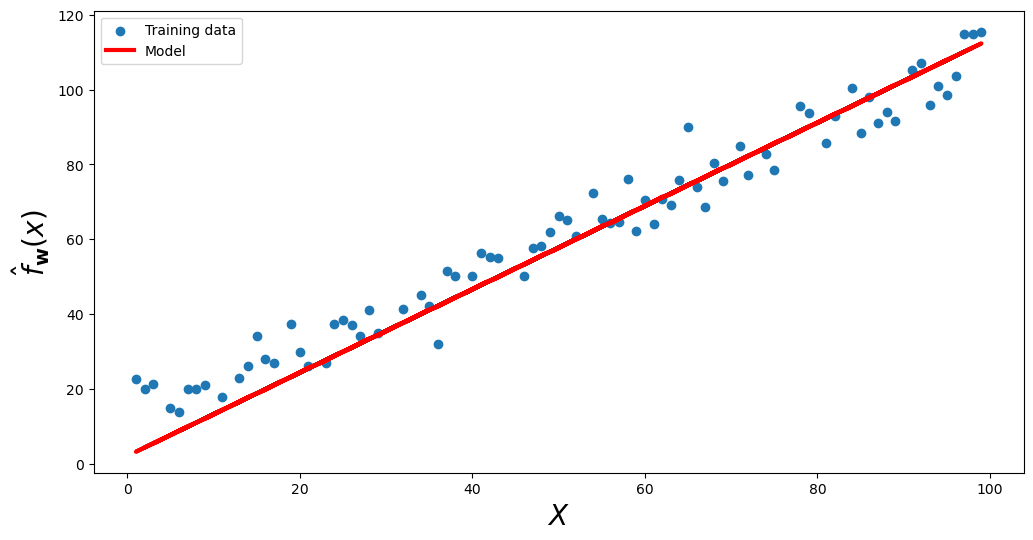

In [111]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

# Plot the results 
plt.figure(figsize=(12,6))

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$X$', fontsize=20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)
plt.legend();

Conclusiones
A lo largo de esta actividad se logró generar un modelo de regrsión linear simple con una base de datos creada aleatoriamente, usando principalmente las herramientas de la librería tensorflow. Esto me fue de mucha utilidad para conocer las funciones relacionadas a la creación y entrenamiento de un modelo de regresión, así como los parámetros de estas funciones y el proceso matemático que se sigue, entendí también la importancia de la visualización de las muestras y la función del modelo para observar patrones inusuales y entender mejor los cambios que causan los parámetros en el mismo.